# Brazillian E-Commerce: Overall Analysis and View

## Importing Packages & Data

### Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Packages Configs

In [2]:
# Matplotlib
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,4)
plt.style.use('fivethirtyeight')
plt.rcParams['axes.grid.axis'] = 'y'

### Data

In [3]:
# Local
#customers = pd.read_csv('C:/Users/josem/Desktop/Olist/Data/olist_customers_dataset.csv')
#geolocation = pd.read_csv('C:/Users/josem/Desktop/Olist/Data/olist_geolocation_dataset.csv')
#order_items = pd.read_csv('C:/Users/josem/Desktop/Olist/Data/olist_order_items_dataset.csv')
#order_payments = pd.read_csv('C:/Users/josem/Desktop/Olist/Data/olist_order_payments_dataset.csv')
#order_reviews = pd.read_csv('C:/Users/josem/Desktop/Olist/Data/olist_order_reviews_dataset.csv')
#orders = pd.read_csv('C:/Users/josem/Desktop/Olist/Data/olist_orders_dataset.csv')
#products = pd.read_csv('C:/Users/josem/Desktop/Olist/Data/olist_products_dataset.csv')
#sellers = pd.read_csv('C:/Users/josem/Desktop/Olist/Data/olist_sellers_dataset.csv')
#product_category_name_translation = pd.read_csv('C:/Users/josem/Desktop/Olist/Data/product_category_name_translation.csv')


# Google Colab
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category_name_translation = pd.read_csv('product_category_name_translation.csv')

# States Analysis

## Customer & Sellers Total Numbers

### Customers per State

In [4]:
# Verifying the number of the missing values in column
customers['customer_state'].isnull().sum() 

0

In [5]:
# Sellers per states
customers_per_state = customers['customer_state'].value_counts() 
customers_per_state_values = np.array(customers_per_state.values)
customers_per_state_alpha2 = np.array(customers_per_state.index)

customers_per_state

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

### Sellers Per State

In [6]:
# Verifying the number of the missing values in column
sellers['seller_state'].isnull().sum() 

0

In [7]:
# Sellers per states
sellers_per_state = sellers['seller_state'].value_counts() 
sellers_per_state_values = np.array(sellers_per_state.values)
sellers_per_state_alpha2 = np.array(sellers_per_state.index)

sellers_per_state

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PA       1
AC       1
PI       1
AM       1
MA       1
Name: seller_state, dtype: int64

### Chart & Insights

#### Chart

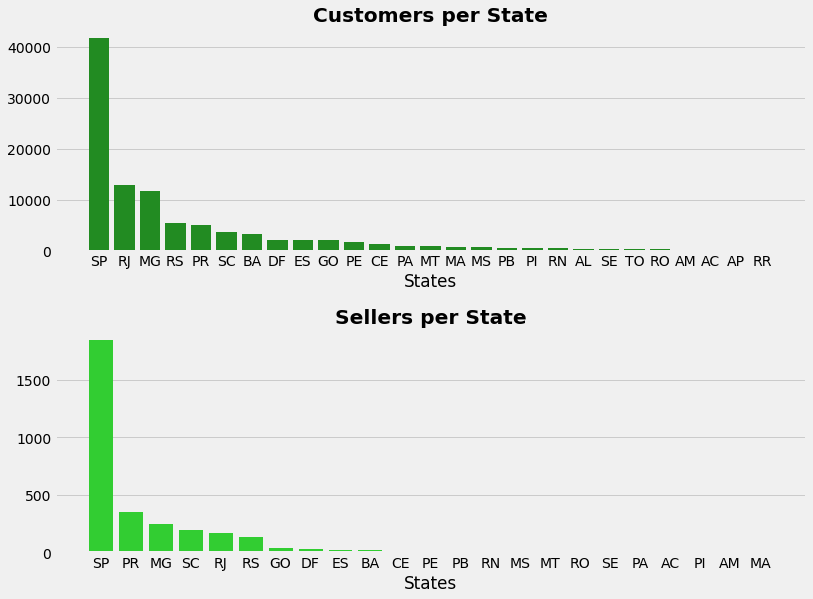

In [8]:
# Figure
fig = plt.figure(figsize = (12, 9))

# First Axes
fig.add_subplot(211)
plt.bar(customers_per_state_alpha2, customers_per_state, color = 'forestgreen')
plt.title('Customers per State', fontweight = 'bold')
plt.xlabel('States')

# Second Axes
fig.add_subplot(212)
plt.bar(sellers_per_state_alpha2, sellers_per_state, color = 'limegreen')
plt.title('Sellers per State', fontweight = 'bold')
plt.xlabel('States')

# Fine adjust in Axes positions
plt.subplots_adjust(hspace=0.35)

# Showing the final result
plt.show()

In [9]:
# Saving chart
fig.savefig('Customers_&_Sellers_States.jpeg', transparent=False, dpi=80, bbox_inches="tight")

#### Insights

From this chart we can get at least two thoughts:

1. The SP (stands for São Paulo) is, without doubt, the E-Commerce pole of Brazil.

2. The PR (stands for Paraná) seems to have a large proportion of sellers per customer.

In the next steps, we will explore if the thoughts are true and because. Starting at item 2.

## Sellers per Customer

### Data Frame

In [10]:
# Customer & Sellers per State Data Frame
customers_per_state_df = customers['customer_state'].value_counts().to_frame(name = 'Customers')
sellers_per_state_df = sellers['seller_state'].value_counts().to_frame(name = 'Sellers')

customers_sellers_per_state = customers_per_state_df.join(sellers_per_state_df, how='inner')

customers_sellers_per_state

,Customers,Sellers
SP,41746,1849
RJ,12852,171
MG,11635,244
RS,5466,129
PR,5045,349
SC,3637,190
BA,3380,19
DF,2140,30
ES,2033,23
GO,2020,40


In [11]:
# Concatening Sellers per Customer in Data Frame
customers_sellers_per_state['Sellers per Customer'] = customers_sellers_per_state['Sellers'].values / customers_sellers_per_state['Customers'].values 
customers_sellers_per_state = customers_sellers_per_state.sort_values(by = 'Sellers per Customer', 
                                                                      axis = 0, ascending = False)

customers_sellers_per_state

,Customers,Sellers,Sellers per Customer
PR,5045,349,0.069177
SC,3637,190,0.052241
SP,41746,1849,0.044292
RS,5466,129,0.023600
MG,11635,244,0.020971
GO,2020,40,0.019802
DF,2140,30,0.014019
RJ,12852,171,0.013305
AC,81,1,0.012346
ES,2033,23,0.011313


### Chart & Insights

#### Chart

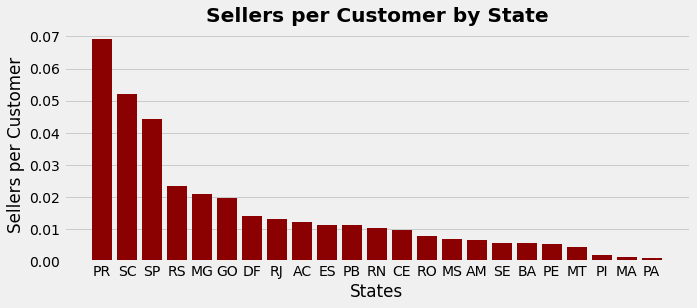

In [12]:
# Figure
fig, ax = plt.subplots()

# Axes
ax.bar(customers_sellers_per_state.index, 'Sellers per Customer',
       data = customers_sellers_per_state, color = "darkred")
ax.set(xlabel='States', ylabel='Sellers per Customer', 
       title='Sellers per Customer by State')
plt.setp(ax.title, fontweight = 'bold')

# Plotting
plt.show()

In [13]:
# Saving the figure
fig.savefig('Sellers_per_Customer_by_State.jpeg', transparent=False, dpi=80, bbox_inches="tight")

#### Insights

So, indeed, PR not only has big sellers per customer proportion as this is the biggest in Brazil. Besides São Paulo, Santa Catarina (SC) and Rio Grande do Sul (RS) are on top. Why? Well, a possible explanation can be taxes. All three states compound the south region where the taxes on interstadial transactions are lower than anyone located in the country.
But, that yet doesn't explain the São Paulo state numbers, so let's dive into this state.

<br/>

*Taxes Infos Source: The National Confederation of Industry (CNI) and Brazilian Micro and Small Business Support Service (SEBRAE), 2013*

## SP State

### Data Frame's

In [14]:
# Customers Data Frame
customers_sp = customers.query('customer_state == "SP"')
customers_sp_cities = customers_sp.customer_city.value_counts().to_frame('Customers')
customers_sp_cities_top20 = customers_sp_cities.nlargest(20, 'Customers')

customers_sp_cities_top20

,Customers
sao paulo,15540
campinas,1444
guarulhos,1189
sao bernardo do campo,938
santo andre,796
osasco,746
santos,713
sao jose dos campos,691
sorocaba,633
jundiai,565


In [15]:
# Sellers Data Frame
sellers_sp = sellers.query('seller_state == "SP"')
sellers_sp_cities = sellers_sp.seller_city.value_counts().to_frame('Sellers')
sellers_sp_cities_top20 = sellers_sp_cities.nlargest(20, 'Sellers')

sellers_sp_cities_top20

,Sellers
sao paulo,694
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41
sao jose do rio preto,33
sorocaba,32
sao bernardo do campo,32
osasco,32


### Chart & Insights

#### Chart

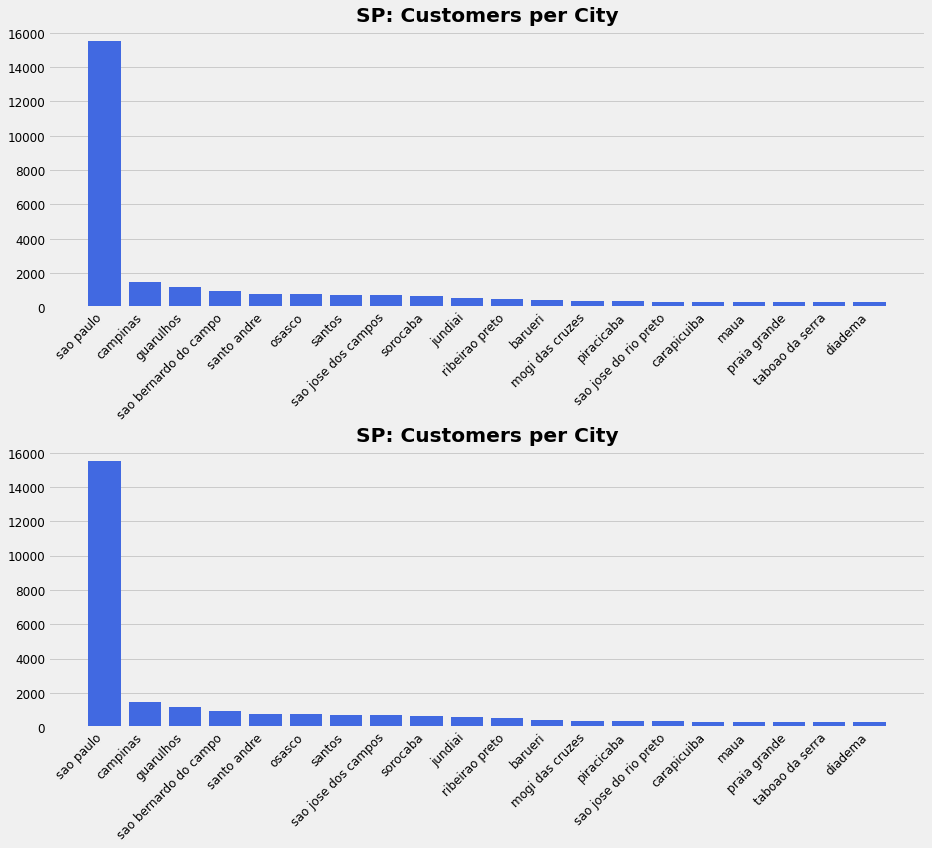

In [16]:
# Figure
fig = plt.figure(figsize = (14, 12))

# First Axes
ax1 = fig.add_subplot(211)
ax1.bar(customers_sp_cities_top20.index, 'Customers', 
        data = customers_sp_cities_top20, color = 'royalblue')
ax1.set(title = "SP: Customers per City")
plt.setp(ax1.get_xticklabels(), rotation = 45, 
         horizontalalignment = 'right', fontsize = 12)
plt.setp(ax1.get_yticklabels(), fontsize = 12)
plt.setp(ax1.title, fontweight = 'bold')

# Second Axes
ax2 = fig.add_subplot(212)
ax2.bar(customers_sp_cities_top20.index, 'Customers', 
        data = customers_sp_cities_top20, color = 'royalblue')
ax2.set(title = "SP: Customers per City")
plt.setp(ax2.get_xticklabels(), rotation = 45, 
         horizontalalignment = 'right', fontsize = 12)
plt.setp(ax2.get_yticklabels(), fontsize = 12)
plt.setp(ax2.title, fontweight = 'bold')

# Adjust in Axes
plt.subplots_adjust(hspace=0.5)

# Plotting
plt.show() 

In [17]:
# Saving the figure
fig.savefig('SP_Customers_per_City.jpeg', transparent=False, dpi=80, bbox_inches="tight")

#### Insights

Now we can see why São Paulo state has more customers and sellers than other states, great most of these people are from the São Paulo city.

The city of São Paulo is the 4th most populated city in the world and not only an E-Commerce pole but the pole of all technology and business of Brazil and even Latin America.

<br/>

*Population Info Source: World Bank Group*

# Freight

## Data Wrangling

In [18]:
# Wrangling Order Items
order_items_wrangled = order_items.set_index('order_id')
order_items_wrangled = order_items_wrangled.drop(columns = ['order_item_id', 
                                                            'product_id', 
                                                            'seller_id', 
                                                            'shipping_limit_date'])

order_items_wrangled.head()

,price,freight_value
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,239.90,19.93
000229ec398224ef6ca0657da4fc703e,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14


In [19]:
# Wrangling Customers
customers_wrangled = customers.set_index('customer_id')
customers_wrangled = customers_wrangled.drop(columns = ['customer_unique_id', 
                                                        'customer_zip_code_prefix'])

customers_wrangled.head()

,customer_city,customer_state
customer_id,,
06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP
b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP
4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP


In [20]:
# Wrangling Orders
order_columns = list(orders.columns.values)
del order_columns[0]
del order_columns[0]
orders_wrangled = orders.drop(order_columns, axis = 1)

orders_wrangled.head()

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c


In [21]:
# Merging Order Items & Customers
orders_values = orders_wrangled.join(order_items_wrangled, on = 'order_id')
orders_values = orders_values.join(customers_wrangled, on = 'customer_id')

# Dropping key columns and rows with missing values
orders_values.drop(['order_id', 'customer_id'], axis = 1, inplace = True)
orders_values.dropna(inplace = True)

# Renaming columns
orders_values.rename({'price': 'Price', 'freight_value': 'Freight', 
                      'customer_city': 'Customer City', 
                      'customer_state': 'Customer State'}, 
                     axis = 1, inplace = True)

orders_values.head()

,Price,Freight,Customer City,Customer State
0,29.99,8.72,sao paulo,SP
1,118.70,22.76,barreiras,BA
2,159.90,19.22,vianopolis,GO
3,45.00,27.20,sao goncalo do amarante,RN
4,19.90,8.72,santo andre,SP


## Freight and Price

### Chart & Insights

#### Chart

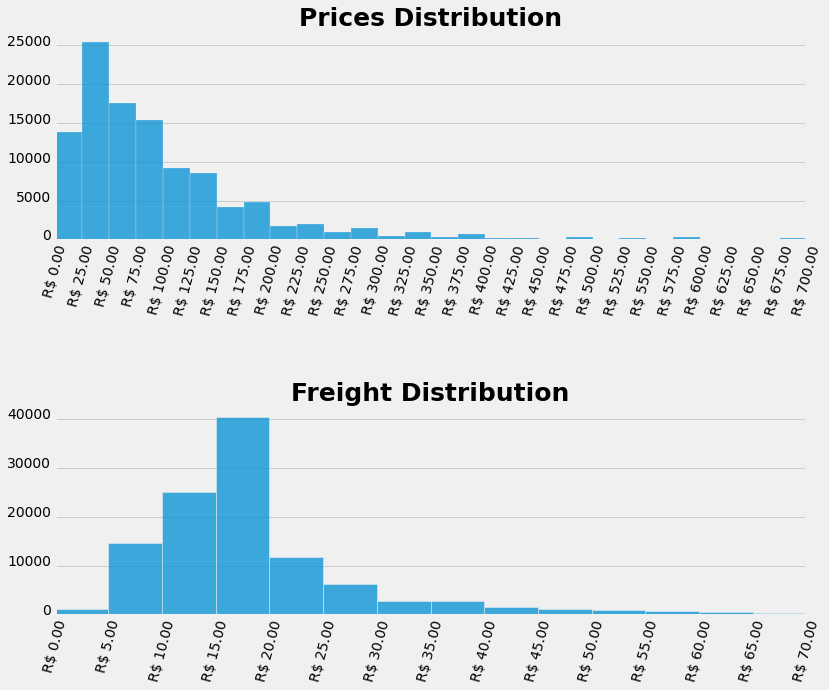

In [22]:
# A function to format labels
def format_as_real(values):
  formated_values = []
  for value in values:
    formated_values.append('R$ %s.00' % value)

  return formated_values 

# Figure
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharey = False)
plt.subplots_adjust(hspace=0.8)

# Axes 0
sns.histplot(data = orders_values, ax = axs[0], x = 'Price', binwidth = 25)
axs[0].set_title('Prices Distribution', fontweight = 'bold', fontsize = 25)
axs[0].set_xlabel('')
axs[0].set_xlim((0, 700))
axs[0].set_xticks(np.arange(0, 701, 25))
axs[0].set_xticklabels(format_as_real(np.arange(0, 701, 25)), rotation = 75)
axs[0].set_ylabel(ylabel = '', labelpad = 16)
plt.setp(axs[0].get_yticklabels(), verticalalignment = 'baseline')

# Axes 1
sns.histplot(data = orders_values, ax = axs[1], x = 'Freight', binwidth = 5)
axs[1].set_title('Freight Distribution', fontweight = 'bold', fontsize = 25)
axs[1].set_xlabel('')
axs[1].set_xlim((0, 70))
axs[1].set_xticks(np.arange(0, 71, 5))
axs[1].set_xticklabels(format_as_real(np.arange(0, 71, 5)), rotation = 75)
axs[1].set_ylabel(ylabel = '', labelpad = 20)
plt.setp(axs[1].get_yticklabels(), verticalalignment = 'baseline')

# Show
plt.show()

In [23]:
# Saving the figure
fig.savefig('Prices_&_Freight_Distributions.jpeg', transparethent=False, dpi=80, bbox_inches="tight")

#### Insights

At first, glance seems the freight and prices walk together, at particular in begin, but look again at to chart and you will see how that isn't true. Observe how in freight graph we have a big concentration in just a bin and then suddenly a large crush, so we can deduce that probably just price doesn't explain freight (more of this soon).

## Freight and Price by State

### Data Preprocessing

In [24]:
# Grouping Values by State
orders_values_total = orders_values.groupby('Customer State').sum()
orders_values_avg = orders_values.groupby('Customer State').mean()

# Merging
  # Renaming Columns
orders_values_total = orders_values_total.rename(columns = {'Price': 'Total Price', 
                                                            'Freight': 'Total Freight'})
orders_values_avg = orders_values_avg.rename(columns = {'Price': 'Average Price', 
                                                           'Freight': 'Average Freight'})
orders_values_avg.head()
orders_values_total.head()
  # Join
orders_values_total_avg = orders_values_total.join(orders_values_avg)

# Pivoting
  # Removing Index
orders_values_total_avg = orders_values_total_avg.reset_index()
orders_values_avg = orders_values_avg.reset_index()

  # Melt
orders_values_total_avg = orders_values_total_avg.melt(id_vars = ['Customer State'], 
                                                       value_vars = ['Total Price', 'Total Freight', 
                                                                     'Average Price', 'Average Freight'], 
                                                       var_name = 'Type', value_name = 'Value')

# Text to columns
orders_values_total_avg[['Measure Type','Measure']] = orders_values_total_avg.Type.str.split(expand=True)

### Chart & Insights

#### Chart

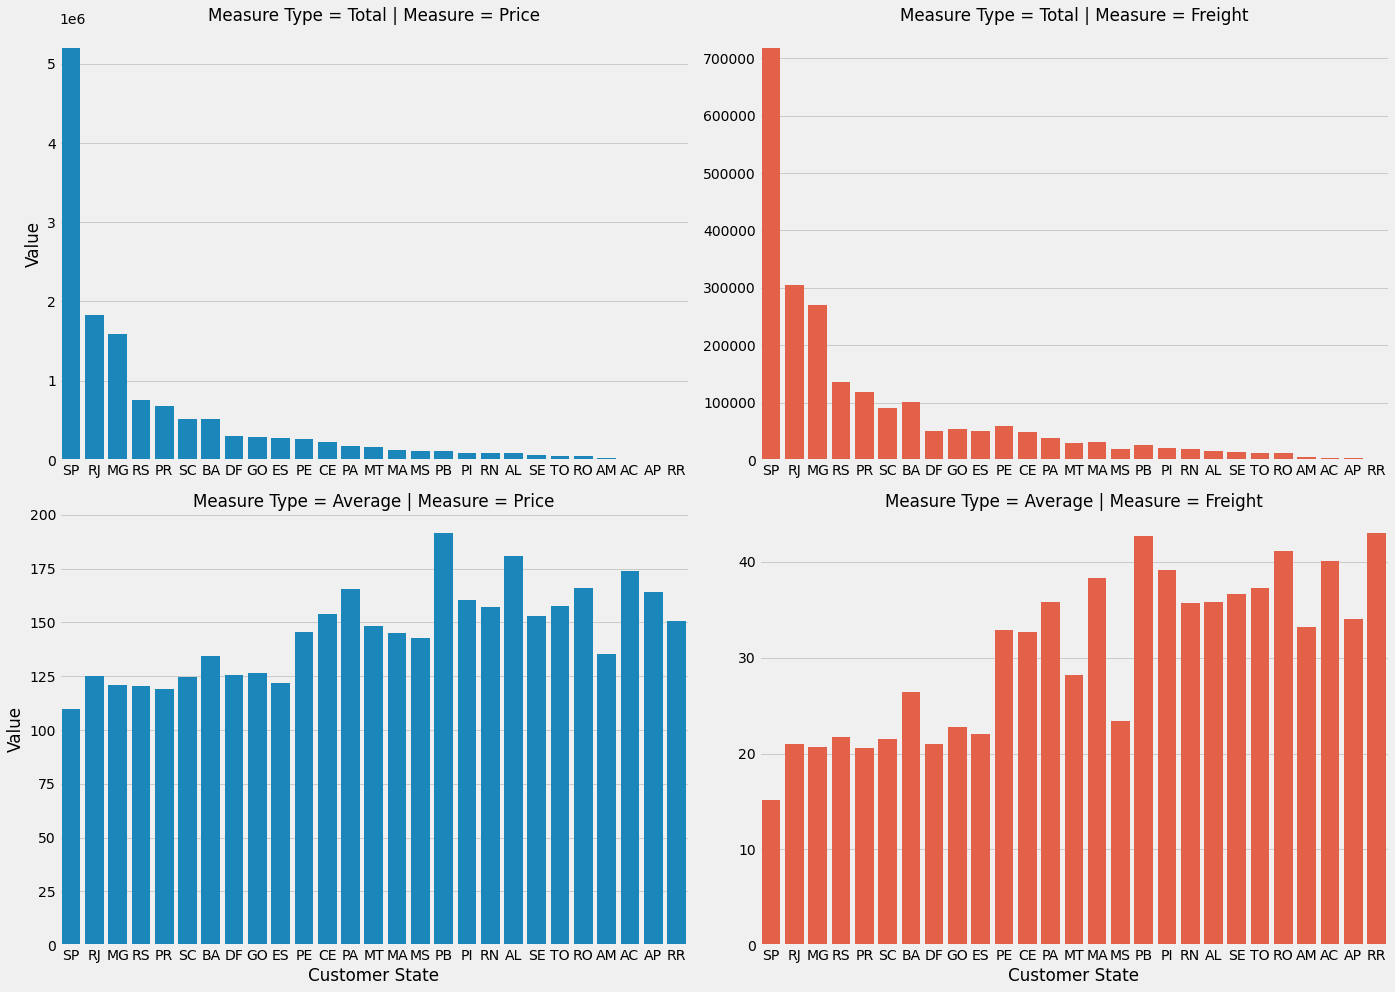

In [25]:
# Getting first states by Total Price
orders_values_total_avg = orders_values_total_avg.sort_values(['Measure Type', 
                                                               'Measure', 'Value'], 
                                                              ascending = False)
sorted_labels = orders_values_total_avg.head(27)['Customer State']

# Figure level plotting
fig = sns.FacetGrid(orders_values_total_avg, col = 'Measure', row  = 'Measure Type', 
                    hue = 'Measure', sharex = False, sharey = False, height = 7, aspect = 1.4)
fig.map(sns.barplot, 'Customer State', 'Value', order = sorted_labels)

In [26]:
# Saving the figure
fig.savefig('Prices_&_Freight_Total_and_Average.jpeg', transparethent=False, dpi=80, bbox_inches="tight")

#### Insights

Before anything let's understand the chart organization:
* Into columns are plots of price and freight.
* In rows we have total and average measures respective.
* All values are grouped by Customer State and all plots sorted by Total Price.

<br/>

Now, first, observe columns and see the prices and freights total across the states, here seems again that in begin both are related, but afterward this relationship disappears.

Second, on rows total are a likely inverse proportionally to average, in other words, how bigger states prices total are, lesser is your order price average. And on columns the states prices and freights averages are at some level equally sorted, which show how large prices are associated with large expensive freights.

# References

**_Data Source:_** Olist

**_Project Link:_**